# Hướng dẫn thực hành 

1. Import library

In [ ]:
pip install mlxtend --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth  

Đọc tệp tin dữ liệu định dạng *xlsx 

In [214]:
df = pd.read_excel('/content/drive/MyDrive/Data for ise lab/Online Retail.xlsx')

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


2. Cắt bỏ các kí tự thừa ở tên mặt hàng mua (cột Description), xóa các dòng dữ liệu không có số hóa đơn (cột InvoiceNo) và chuyển nó về kiểu dữ liệu chuỗi 

In [216]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [217]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


3. Ví dụ về loại hóa đơn tín dụng bằng câu lệnh như sau 

In [218]:
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Xóa những hóa đơn tính dụng 

In [219]:
df = df[~df['InvoiceNo'].str.contains('C')]

4. Thống kê số dòng dữ liệu theo từng quốc gia

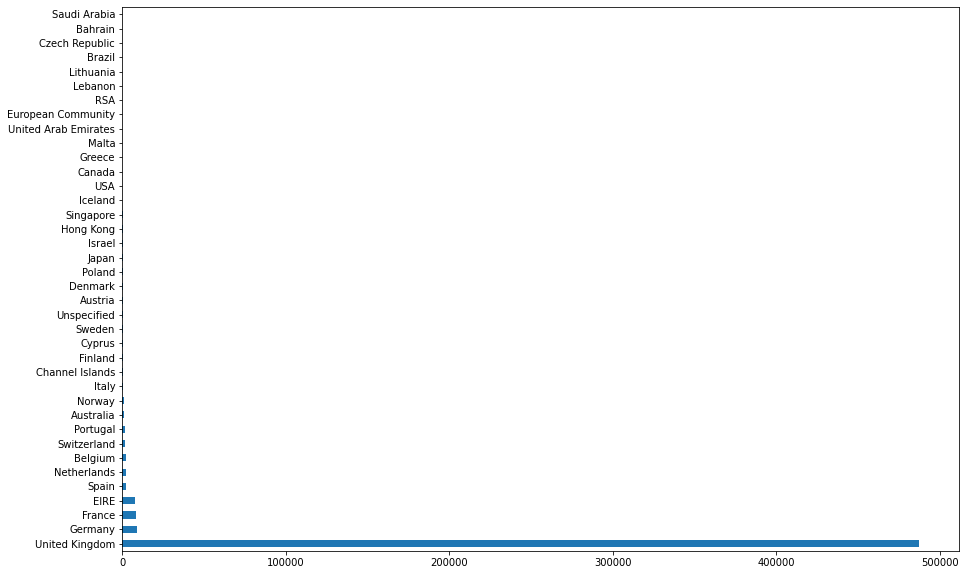

In [220]:
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

5. Chỉ xét các hóa đơn từ nước Anh và nhóm dữ liệu theo Số hóa đơn và Tên mặt hàng 

In [221]:
basket = df[df['Country'] == "United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity']

6. Chuyển đổi dữ liệu về dạng hot encoding, với mỗi dòng dữ liệu là một hóa đơn 

In [222]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

Xem dữ liệu sau khi chuyển về dạng hot encoding 

In [223]:
basket.head(10)

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


7. Tạo hàm biến đổi mỗi điểm dữ liệu có số lượng (Quantity) lớn hơn 0 thành 1 

In [224]:
def encode_data(datapoint):
  if datapoint <=0:
    return 0
  return 1

Chuyển hot encoding thành one-hot encoding 

In [225]:
basket = basket.applymap(encode_data)

8. Xóa cột 'POSTAGE' 

In [226]:
basket.drop('POSTAGE', inplace=True, axis=1)

9. Áp dụng thuật toán Apriori với min_sup=3% để tìm tập phổ biến 

In [227]:
itemsets = apriori(basket, min_support=0.03, use_colnames=True)

In [228]:
itemsets.head(10)

,support,itemsets
0,0.045803,(6 RIBBONS RUSTIC CHARM)
1,0.031124,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040339,(60 TEATIME FAIRY CAKE CASES)
3,0.046928,(ALARM CLOCK BAKELIKE GREEN)
4,0.035142,(ALARM CLOCK BAKELIKE PINK)
5,0.049821,(ALARM CLOCK BAKELIKE RED)
6,0.036214,(ANTIQUE SILVER T-LIGHT GLASS)
7,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
8,0.042267,(BAKING SET 9 PIECE RETROSPOT)
9,0.035089,(BATHROOM METAL SIGN)


10. Tạo luật kết hợp với min_conf=50% 

In [ ]:
rules= association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [ ]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
dtypes: float64(7), object(2)
memory usage: 848.0+ bytes


Chuyển đối vế trái và vế phải từ kiểu object(frozenset) về kiểu chuỗi (unicode) 

In [ ]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

Viết lệnh in ra các luật đã tìm được 

In [ ]:
for i in range(len(rules)):
  print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'],
        '[', rules.loc[i, 'support'], rules.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE RED [ 0.030160175711148016 0.6426940639269406 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE GREEN [ 0.030160175711148016 0.6053763440860216 ]
PINK REGENCY TEACUP AND SAUCER ==> GREEN REGENCY TEACUP AND SAUCER [ 0.030910162318530027 0.8207681365576103 ]
GREEN REGENCY TEACUP AND SAUCER ==> PINK REGENCY TEACUP AND SAUCER [ 0.030910162318530027 0.6177730192719486 ]
ROSES REGENCY TEACUP AND SAUCER ==> GREEN REGENCY TEACUP AND SAUCER [ 0.03755290084105641 0.7324973876698014 ]
GREEN REGENCY TEACUP AND SAUCER ==> ROSES REGENCY TEACUP AND SAUCER [ 0.03755290084105641 0.7505353319057816 ]
JUMBO  BAG BAROQUE BLACK WHITE ==> JUMBO BAG RED RETROSPOT [ 0.03053516901483902 0.6263736263736264 ]
JUMBO BAG PINK POLKADOT ==> JUMBO BAG RED RETROSPOT [ 0.042052820485348474 0.6773080241587576 ]
JUMBO SHOPPER VINTAGE RED PAISLEY ==> JUMBO BAG RED RETROSPOT [ 0.03519580007499866 0.5798764342453663 ]
JUMBO STORAGE BAG SUKI ==> JUMBO BAG RED RETROSPOT [ 

11. Lấy giá trị độ hỗ trợ và độ tin cậy của tập luật 

In [ ]:
support = rules['support'].values
confidence = rules['confidence'].values

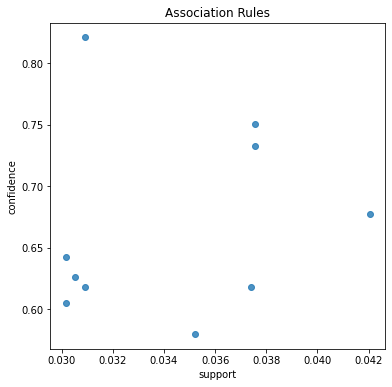

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support, y=confidence, fit_reg=False)

12. Import module fpgrowth từ thư viện mlxtend và thực hiện tìm tập phổ biến thuật toán FP-Growth 

In [229]:
itemsets = fpgrowth.fpgrowth(basket, min_support=0.03, use_colnames=True)

/usr/local/lib/python3.7/dist-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [ ]:
itemsets.head(10)

,support,itemsets
0,0.116034,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
2,0.040071,(HOME BUILDING BLOCK WORD)
3,0.032517,(LOVE BUILDING BLOCK WORD)
4,0.030107,(DOORMAT NEW ENGLAND)
5,0.053517,(JAM MAKING SET WITH JARS)
6,0.060267,(PAPER CHAIN KIT 50'S CHRISTMAS)
7,0.057642,(WOODEN PICTURE FRAME WHITE FINISH)
8,0.050463,(WOODEN FRAME ANTIQUE WHITE)
9,0.037714,(RED HANGING HEART T-LIGHT HOLDER)


In [ ]:
rules= association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [ ]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
dtypes: float64(7), object(2)
memory usage: 848.0+ bytes


In [ ]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [ ]:
for i in range(len(rules)):
  print(rules.loc[i, 'antecedents'], "==>", rules.loc[i, 'consequents'],
        '[', rules.loc[i, 'support'], rules.loc[i, 'confidence'], ']')

JUMBO BAG PINK POLKADOT ==> JUMBO BAG RED RETROSPOT [ 0.042052820485348474 0.6773080241587576 ]
JUMBO STORAGE BAG SUKI ==> JUMBO BAG RED RETROSPOT [ 0.037392189425188835 0.6176991150442478 ]
JUMBO  BAG BAROQUE BLACK WHITE ==> JUMBO BAG RED RETROSPOT [ 0.03053516901483902 0.6263736263736264 ]
JUMBO SHOPPER VINTAGE RED PAISLEY ==> JUMBO BAG RED RETROSPOT [ 0.03519580007499866 0.5798764342453663 ]
ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE RED [ 0.030160175711148016 0.6426940639269406 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE GREEN [ 0.030160175711148016 0.6053763440860216 ]
ROSES REGENCY TEACUP AND SAUCER ==> GREEN REGENCY TEACUP AND SAUCER [ 0.03755290084105641 0.7324973876698014 ]
GREEN REGENCY TEACUP AND SAUCER ==> ROSES REGENCY TEACUP AND SAUCER [ 0.03755290084105641 0.7505353319057816 ]
PINK REGENCY TEACUP AND SAUCER ==> GREEN REGENCY TEACUP AND SAUCER [ 0.030910162318530027 0.8207681365576103 ]
GREEN REGENCY TEACUP AND SAUCER ==> PINK REGENCY TEACUP AND SAUCER [ 

In [ ]:
support = rules['support'].values
confidence = rules['confidence'].values

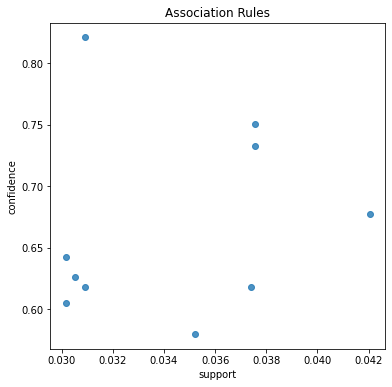

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support, y=confidence, fit_reg=False)

Comment:
- kết quả và tập luật của cả 2 giải thuật đều giống nhau 

# Bài tập 5
- Nước Đức 'Germany' min_sup=5%, min_conf=50%
- Nước Pháp 'France' min_sup=7%, min_conf=70%

***THEO GIẢI THUẬT APRIORI***

Chỉ xét các hóa đơn từ nước Đức,France  và nhóm dữ liệu theo Số hóa đơn và Tên mặt hàng 

In [ ]:
basket_germany = df[df['Country'] == "Germany"].groupby(['InvoiceNo', 'Description'])['Quantity']

In [ ]:
basket_france = df[df['Country'] == "France"].groupby(['InvoiceNo', 'Description'])['Quantity']

Chuyển đổi dữ liệu về dạng hot encoding, với mỗi dòng dữ liệu là một hóa đơn 

In [ ]:
basket_germany = basket_germany.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket_germany.head(5)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket_france = basket_france.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket_france.head(5)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Chuyển hot encoding thành one-hot encoding 

In [ ]:
basket_germany = basket_germany.applymap(encode_data)

basket_germany.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
basket_france = basket_france.applymap(encode_data)

basket_france.drop('POSTAGE', inplace=True, axis=1)

Áp dụng thuật toán Apriori với Germany: min_sup=5%, France: min_sup=7%  để tìm tập phổ biến 

In [ ]:
itemsets_germany = apriori(basket_germany, min_support=0.05, use_colnames=True)

In [ ]:
itemsets_germany.head(10)

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.061269,(COFFEE MUG APPLES DESIGN)
5,0.063457,(FAWN BLUE HOT WATER BOTTLE)
6,0.072210,(GUMBALL COAT RACK)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.063457,(JAM JAR WITH PINK LID)
9,0.091904,(JAM MAKING SET PRINTED)


In [ ]:
itemsets_france = apriori(basket_france, min_support=0.07, use_colnames=True)

In [ ]:
itemsets_france.head(10)

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


Tạo luật kết hợp với Germany: min_conf=50%, France: min_conf=70%

In [ ]:
rules_germany= association_rules(itemsets_germany, metric="confidence", min_threshold=0.5)
rules_germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   leverage            8 non-null      float64
 8   conviction          8 non-null      float64
dtypes: float64(7), object(2)
memory usage: 704.0+ bytes


In [ ]:
rules_france= association_rules(itemsets_france, metric="confidence", min_threshold=0.7)
rules_france.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         20 non-null     object 
 1   consequents         20 non-null     object 
 2   antecedent support  20 non-null     float64
 3   consequent support  20 non-null     float64
 4   support             20 non-null     float64
 5   confidence          20 non-null     float64
 6   lift                20 non-null     float64
 7   leverage            20 non-null     float64
 8   conviction          20 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.5+ KB


Chuyển đối vế trái và vế phải từ kiểu object(frozenset) về kiểu chuỗi (unicode) 

In [ ]:
def print_rule(rules):
  for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'],
        '[', rules.loc[i, 'support'], rules.loc[i, 'confidence'], ']')  

In [ ]:
rules_germany["antecedents"] = rules_germany["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_germany["consequents"] = rules_germany["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [ ]:
print_rule(rules_germany)

PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 0.5849056603773585 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 0.5714285714285714 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 0.5396825396825397 ]
RED RETROSPOT CHARLOTTE BAG ==> WOODLAND CHARLOTTE BAG [ 0.05908096280087528 0.8437500000000001 ]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 0.5357142857142857 ]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 0.8333333333333333 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 0.6808510638297872 ]
WOODLAND CHARLOTTE BAG ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 0.5 ]


In [ ]:
rules_france["antecedents"] = rules_france["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_france["consequents"] = rules_france["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [ ]:
print_rule(rules_france)

ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469 0.7631578947368421 ]
ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE GREEN [ 0.07397959183673469 0.725 ]
ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE RED [ 0.07908163265306123 0.8157894736842106 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE GREEN [ 0.07908163265306123 0.8378378378378379 ]
ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE RED [ 0.07397959183673469 0.725 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469 0.7837837837837838 ]
DOLLY GIRL LUNCH BOX ==> SPACEBOY LUNCH BOX [ 0.07142857142857142 0.717948717948718 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.10459183673469388 0.7592592592592594 ]
SET/6 RED SPOTTY PAPER CUPS ==> SET/20 RED RETROSPOT PAPER NAPKINS [ 0.10204081632653061 0.7407407407407408 ]
SET/20 RED RETROSPOT PAPER NAPKINS ==> SET/6 RED SPOTTY PAPER CUPS [ 0.10204081632653061 0.7692307692307692 ]
SET/20 RED RETROSPOT 

Lấy giá trị độ hỗ trợ và độ tin cậy của tập luật 

In [ ]:
def get_value_and_visualize(rules):
  support = rules['support'].values
  confidence = rules['confidence'].values
  plt.figure(figsize=(6,6))
  plt.title('Association Rules')
  plt.xlabel('support')
  plt.ylabel('confidence')
  sns.regplot(x= support, y=confidence, fit_reg=False)

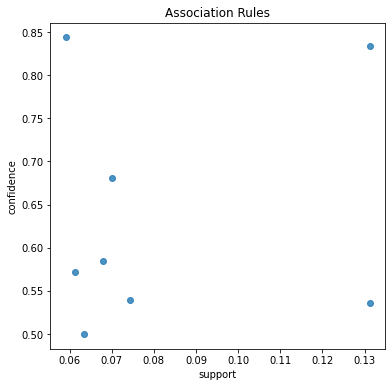

In [ ]:
get_value_and_visualize(rules_germany)

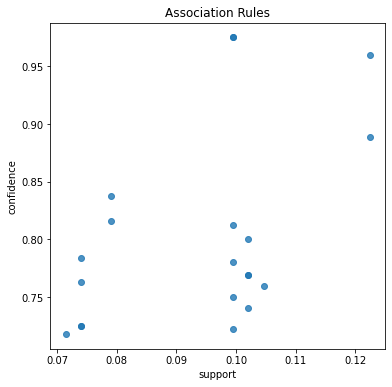

In [ ]:
get_value_and_visualize(rules_france)

***THEO GIẢI THUẬT FPGROWTH***

In [ ]:
itemsets_ger = fpgrowth.fpgrowth(basket_germany, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.7/dist-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [ ]:
itemsets_ger.head(10)

,support,itemsets
0,0.100656,(JUMBO BAG WOODLAND ANIMALS)
1,0.102845,(6 RIBBONS RUSTIC CHARM)
2,0.091904,(JAM MAKING SET PRINTED)
3,0.085339,(PACK OF 72 RETROSPOT CAKE CASES)
4,0.063457,(JAM JAR WITH PINK LID)
5,0.078775,(JUMBO BAG RED RETROSPOT)
6,0.067834,(WOODLAND PARTY BAG + STICKER SET)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.054705,(MEMO BOARD COTTAGE DESIGN)
9,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND)


In [ ]:
itemsets_fr = fpgrowth.fpgrowth(basket_france, min_support=0.07, use_colnames=True)

/usr/local/lib/python3.7/dist-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [ ]:
itemsets_fr.head(10)

,support,itemsets
0,0.181122,(RED TOADSTOOL LED NIGHT LIGHT)
1,0.158163,(ROUND SNACK BOXES SET OF4 WOODLAND)
2,0.125000,(SPACEBOY LUNCH BOX)
3,0.104592,(MINI PAINT SET VINTAGE)
4,0.102041,(ALARM CLOCK BAKELIKE PINK)
5,0.096939,(ALARM CLOCK BAKELIKE GREEN)
6,0.094388,(ALARM CLOCK BAKELIKE RED)
7,0.153061,(LUNCH BAG RED RETROSPOT)
8,0.142857,(LUNCH BOX WITH CUTLERY RETROSPOT)
9,0.137755,(RED RETROSPOT MINI CASES)


In [ ]:
rules_ger= association_rules(itemsets_ger, metric="confidence", min_threshold=0.5)
rules_ger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   leverage            8 non-null      float64
 8   conviction          8 non-null      float64
dtypes: float64(7), object(2)
memory usage: 704.0+ bytes


In [ ]:
rules_fr= association_rules(itemsets_fr, metric="confidence", min_threshold=0.7)
rules_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         20 non-null     object 
 1   consequents         20 non-null     object 
 2   antecedent support  20 non-null     float64
 3   consequent support  20 non-null     float64
 4   support             20 non-null     float64
 5   confidence          20 non-null     float64
 6   lift                20 non-null     float64
 7   leverage            20 non-null     float64
 8   conviction          20 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.5+ KB


In [ ]:
rules_ger["antecedents"] = rules_ger["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_ger["consequents"] = rules_ger["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [ ]:
rules_fr["antecedents"] = rules_fr["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_fr["consequents"] = rules_fr["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [ ]:
print_rule(rules_ger)

ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 0.5357142857142857 ]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 0.8333333333333333 ]
WOODLAND CHARLOTTE BAG ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 0.5 ]
PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 0.5849056603773585 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 0.6808510638297872 ]
RED RETROSPOT CHARLOTTE BAG ==> WOODLAND CHARLOTTE BAG [ 0.05908096280087528 0.8437500000000001 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 0.5396825396825397 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 0.5714285714285714 ]


In [ ]:
print_rule(rules_fr)

ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469 0.7631578947368421 ]
ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE GREEN [ 0.07397959183673469 0.725 ]
ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE RED [ 0.07908163265306123 0.8157894736842106 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE GREEN [ 0.07908163265306123 0.8378378378378379 ]
ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE RED [ 0.07397959183673469 0.725 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469 0.7837837837837838 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.10459183673469388 0.7592592592592594 ]
SET/6 RED SPOTTY PAPER CUPS ==> SET/6 RED SPOTTY PAPER PLATES [ 0.12244897959183673 0.888888888888889 ]
SET/6 RED SPOTTY PAPER PLATES ==> SET/6 RED SPOTTY PAPER CUPS [ 0.12244897959183673 0.96 ]
SET/20 RED RETROSPOT PAPER NAPKINS ==> SET/6 RED SPOTTY PAPER PLATES [ 0.10204081632653061 0.7692307692307692 ]
SET/6 RED SPOTTY PAP

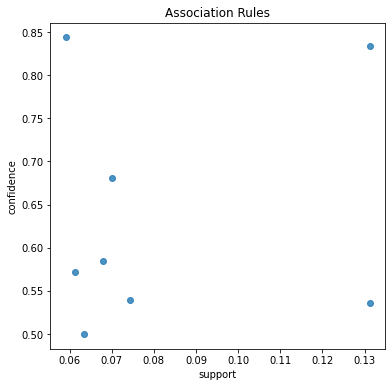

In [ ]:
get_value_and_visualize(rules_ger)

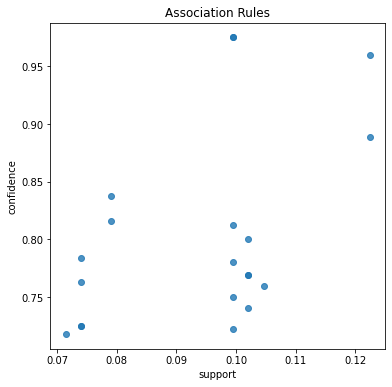

In [ ]:
get_value_and_visualize(rules_fr)

# Nhận xét: 


 Đối với dữ liệu hóa đơn từ nước Đức, khi áp dụng giải thuật Apriori và giải thuật FPGrowth đều có kết quả giống nhau về tập phổ biến (với min_sup=5%) và tập kết hợp (min_conf=50%)


 Đối với dữ liệu hóa đơn từ nước Pháp , 2 giải thuật Apriori và FPGrowth đều cho ra kết quả giống về tập phổ biến (với min_sup=7%) và  tập kết hợp (min_conf=70%).
